# LINGUAGEM NATURAL E INTELIGÊNCIA ARTIFICIAL


## MODELOS DE CLASSIFICAÇÃO AUTOMÁTICA DE TEXTO

Carlos Catalão Alves  
13 Maio, 2018

#### Aplicação:

Obter e comparar os resultados de diferentes modelos, usados em Aprendizagem Máquina, para classificação automática de textos. 
  

Os modelos utilizados são:  

1. k-Nearest Neighbor (kNN)   
2. SGDClassifier  
3. Perceptron  
4. Naive Bayes (modelos Multinominal e Bernoulli)  

Em cada um dos modelos será possível observar um relatório detalhado, incluindo diversos dados métricos. É produzido também um gráfico comparativo dos diferentes modelos. 

Os dados são lidos num ficheiro csv, delimitado por tabs (textos_treino.csv), e são divididos em séries para treino e para teste. Os resultados são obtidos a partir de uma comparação entre as classificações previstas pelos modelos treinados e as classificações reais à partida.


#### Livrarias python

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

#### Livrarias NLTK - Natural Langage Processing Toolkit

In [3]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

#### Livrarias SciKit Learn

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 

#### Variáveis

In [5]:
report = []
categorias = [ "Astronomia","Biologia","Geologia","Engenharia","Patrimonio"]

#### Funções

In [6]:
def tokenizar(texto, stemizar=True, lingua="portuguese"):

    # Usa o SnowballStemmer do NLTK para português
    stemizador = SnowballStemmer(lingua)

    # Tokeniza por frase e por palavra
    tokens = [word.lower() for frase in nltk.sent_tokenize(texto) for word in nltk.word_tokenize(frase)]
    
    # Aplica NLTK stopwords 
    stop_words_pt = set(stopwords.words(lingua)) 
    
    # Filtra as palavras que não têm letras, e as que estão na lista de stopwords
    tokens_filtrados = []
    for token in tokens:
        if re.search("[a-zA-Z]", token):
            if token not in stopwords.words(lingua):
                if token not in stop_words_pt:
                    tokens_filtrados.append(token)
                if stemizar:
                    stems = [stemizador.stem(token) for token in tokens_filtrados]
    return stems


In [7]:
# Relatório de classificação
def reporta(clf, modelo):
    
    print("\nModelo: %s" % modelo)
    print('_' * 80)

    clf.fit(X_treino, y_treino)
    previsao = clf.predict(X_teste)
    score = metrics.accuracy_score(y_teste, previsao)
    print("\nacurancy: %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("\nTermos mais relevantes em cada categoria:\n")
        for i, label in enumerate(categorias):
            top10 = np.argsort(clf.coef_[i])[-10:]
            print(trim("%s: \t %s" % (label, "  ".join(termos[top10]))))
        print()


    print("\nRelatório:")
    print(metrics.classification_report(y_teste, previsao, target_names=categorias))
    print("\nconfusion matrix:")
    print(metrics.confusion_matrix(y_teste, previsao))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score

In [8]:
def trim(s):
    # Assegura apresentação dentro dos limites das 80 colunas do terminal
    return s if len(s) <= 80 else s[:77] + "..."

#### Importa ficheiro csv com textos

In [9]:
# Importando os dados de treino
dados = pd.read_csv('textos_treino.csv', delimiter = '\t', quoting = 3)

#### Partição dos dados em treino e teste

In [10]:
X = dados["texto"]
y = dados["target"]

# Dividir documentos em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print("%d documentos de treino" % (len(X_treino)))
print("%d documentos de teste" % (len(X_teste)))
print("%d categorias" % len(categorias))
print()

16 documentos de treino
4 documentos de teste
5 categorias



#### Dados de treino: Pré-processamento e vectorização 

In [11]:
print("A extrair termos de %d documentos de treino ..."  % (len(X_treino)))
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', tokenizer=tokenizar)
X_treino = vectorizer.fit_transform(X_treino)
duracao = time() - t0
print("Termos extraídos em: {0:.1f}s".format(duracao))
print("documentos: %d, termos: %d" % X_treino.shape)
print()

A extrair termos de 16 documentos de treino ...
Termos extraídos em: 5.7s
documentos: 16, termos: 780



#### Dados de teste: Pré-processamento e vectorização 

In [12]:
print("A extrair termos de %d documentos de teste ..."  % (len(X_teste)))
t0 = time()
X_teste = vectorizer.transform(X_teste)
duracao = time() - t0
print("Termos extraídos em: {0:.1f}s".format(duracao))
print("documentos: %d, termos: %d" % X_teste.shape)
print()

A extrair termos de 4 documentos de teste ...
Termos extraídos em: 1.5s
documentos: 4, termos: 780



#### Associar vectores aos termos originais

In [13]:
# Ligar cada vector ao termo original, para mostrar os mais relevantes
termos = vectorizer.get_feature_names()
if termos:
    termos = np.asarray(termos)

### Aplicar os modelos 

#### Perceptron

In [14]:
from sklearn.linear_model import Perceptron
report.append(reporta(Perceptron(max_iter=50), "Perceptron"))


Modelo: Perceptron
________________________________________________________________________________

acurancy: 1.000

Termos mais relevantes em cada categoria:

Astronomia: 	 pol  conceit  observacional  moviment  aparent  estrel  constel...
Biologia: 	 medicin  muit  alcobac  valor  equilíbri  constitu  candeeir  esp...
Geologia: 	 geolog  human  roch  gerês  granít  geoform  vertent  instabil  r...
Engenharia: 	 carvã  electr  termoeléctr  sin  queim  betumin  plataform  sul...
Patrimonio: 	 project  igrej  estud  ermid  investig  alentej  pintur  diagnó...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      1.00      1.00         1
   Biologia       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         4


confusion matrix:
[[1 0]
 [0 3]]



/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 5
  .format(len(labels), len(target_names))


#### k-Nearest Neighbor (kNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
report.append(reporta(KNeighborsClassifier(n_neighbors=10), "KNeighbors Classifier"))


Modelo: KNeighbors Classifier
________________________________________________________________________________

acurancy: 0.250

Relatório:
             precision    recall  f1-score   support

 Astronomia       0.50      1.00      0.67         1
   Biologia       0.00      0.00      0.00         3
   Geologia       0.00      0.00      0.00         0

avg / total       0.12      0.25      0.17         4


confusion matrix:
[[1 0 0]
 [1 0 2]
 [0 0 0]]



/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 3, does not match size of target_names, 5
  .format(len(labels), len(target_names))
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### SGDClassifier

In [16]:
from sklearn.linear_model import SGDClassifier
report.append(reporta(SGDClassifier(alpha=.0001, max_iter=50, penalty="elasticnet"), "SGDC Classifier"))


Modelo: SGDC Classifier
________________________________________________________________________________

acurancy: 0.250

Termos mais relevantes em cada categoria:

Astronomia: 	 introdu  explic  noit  sessã  particip  astronom  relógi  estre...
Biologia: 	 sop  muit  equilíbri  valor  alcobac  constitu  candeeir  espéc  ...
Geologia: 	 característ  gerês  geoform  granít  vertent  instabil  rio  regi...
Engenharia: 	 hidroeléctr  entrou  industrial  energ  construçã  mw  gui  ser...
Patrimonio: 	 diagnóst  investig  pintur  estud  ermid  conserv  igrej  alent...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      1.00      1.00         1
   Biologia       0.00      0.00      0.00         3
   Geologia       0.00      0.00      0.00         0
 Engenharia       0.00      0.00      0.00         0

avg / total       0.25      0.25      0.25         4


confusion matrix:
[[1 0 0 0]
 [0 0 2 1]
 [0 0 0 0]
 [0 0 0 0]]



/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 5
  .format(len(labels), len(target_names))
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### NAIVE BAYES

In [17]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

#### Multinomial

In [18]:
report.append(reporta(MultinomialNB(alpha=.01), "MultinomialNB"))


Modelo: MultinomialNB
________________________________________________________________________________

acurancy: 1.000

Termos mais relevantes em cada categoria:

Astronomia: 	 astronóm  particip  activ  planetári  relógi  sessõ  estrel  co...
Biologia: 	 serr  valor  alcobac  equilíbri  constitu  candeeir  espéc  val  ...
Geologia: 	 vertent  sobr  divers  activ  instabil  rio  regiã  val  peg  din...
Engenharia: 	 entrou  industrial  energ  construçã  gui  mw  visit  servic  p...
Patrimonio: 	 pintur  project  conserv  alentej  estud  igrej  investig  lev ...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      1.00      1.00         1
   Biologia       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         4


confusion matrix:
[[1 0]
 [0 3]]



/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 5
  .format(len(labels), len(target_names))


#### Bernoulli

In [19]:
report.append(reporta(BernoulliNB(alpha=.01), "BernoulliNB"))


Modelo: BernoulliNB
________________________________________________________________________________

acurancy: 0.250

Termos mais relevantes em cada categoria:

Astronomia: 	 long  activ  tem  explic  sessõ  constel  sobr  planetári  sol ...
Biologia: 	 estend  mamífer  cel  cavidad  madeireir  caud  ribeir  carrascal...
Geologia: 	 vam  ciênc  desd  paisag  roch  sobr  rio  activ  regiã  geológ
Engenharia: 	 industrial  construçã  servic  energ  entrou  potênc  mw  grup ...
Patrimonio: 	 descobert  preserv  pretende-s  cruz  project  prol  construír ...


Relatório:
             precision    recall  f1-score   support

 Astronomia       1.00      1.00      1.00         1
   Biologia       0.00      0.00      0.00         3
   Geologia       0.00      0.00      0.00         0
 Engenharia       0.00      0.00      0.00         0

avg / total       0.25      0.25      0.25         4


confusion matrix:
[[1 0 0 0]
 [0 0 2 1]
 [0 0 0 0]
 [0 0 0 0]]



/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 5
  .format(len(labels), len(target_names))
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/calves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### GRÁFICO COMPARATIVO

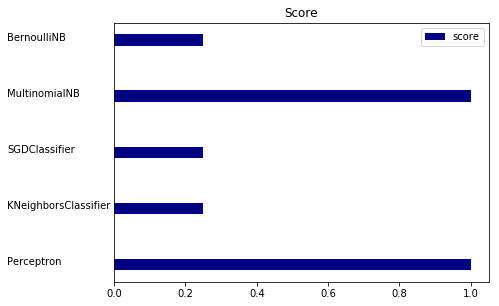

In [20]:
indices = np.arange(len(report))
report = [[x[i] for x in report] for i in range(2)]
clf_names, score = report
plt.figure(figsize=(8, 4))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)
plt.show()